In [8]:
# Dependencies Import Setup 
#---------------------------
import pandas as pd  
# Pandas is used for data manipulation and analysis, such as reading and working with CSV files.
from pathlib import Path
# The path class provides as easy and platform-independent way to work with file system paths.
import numpy as np
# NumPy is used for numerical operations and working with arrays, which is often helpful in data analysis.
import matplotlib.pyplot as plt
# Pyplot is used to create visualizations like plots and charts.
import requests
# The requests library is used to make HTTP requests, which can be useful for fetching data from web APIs.
import os
# The os module provides a way to interact with the operations system, such as reading enviroment variables or working with file paths

%matplotlib inline
# This is a jupyter notebook magic command
# It tells the notebook to display Matplotlib plots directly within the notebook cells (inline) rather than in a seprarte window.

# Import API key
# from api_keys import geoapify_key

import hvplot.pandas

import seaborn as sns

from scipy.stats import linregress

import plotly.graph_objects as go



In [12]:
# 1. Data Cleaning & Preperation
# ------------------------------

file_path = Path('/Users/tatendamanenji/Desktop/Repos/ev-charging-stations/Tatenda/detailed_ev_charging_stations.csv')
# Creates a Path object that points to the CSV file.
# Using a Path object helps manage file paths in a way that's indepentent of the operating system.
# Be cautious with backslashes (\) as they can be interpreted as escape characters. You might consider using raw strings (e.g., r"\Repos\ev-charging-stations\data\
# detailed_ev_charging_station.csv") or forward slashes (/).

detailed_ev_charging_station = pd.read_csv(file_path)
# Reads the csv file located at file_path into a Pandas DataFrame called detailed_ev_charging_station.
# This allows you to work with the data (e.g., inspect, manipluate, analyze) using the tools provided by Pandas.

detailed_ev_charging_station.rename(columns={ 
    'Installation Year': 'Installation Year',
    'Charging Capacity (kW)': 'Charging Capacity (kW)',
    '24/7 Availability': 'Is_24_7',
    'Usage Stats (avg users/day)': 'Usage (avg users/day)'
}, inplace=True)
# detailed_ev_charging_station.rename(columns={...}, inplace=True): This line renames the columns of the DataFrame.
# inplace=True: This argument modifes the origianl DataFrame directly rather than creating a new DataFrame with renamed columns.

initial_count = detailed_ev_charging_station.shape[0]
# This line assigns the number of rows in the DataFrame to the variable initial_counts.
    # .shape[0]: The shape attribute returns a truple representing the demensionality of the DataFrame. The first element (index 0) of the truple represents 
    # the nuber of rows.
detailed_ev_charging_station.drop_duplicates(inplace=True)
# This line drops the duplicate rows from the DataFrame.
    # drop_duplicates(): This method removes duplicate rows from the DataFrame.
    # inplace=True: This argumnet modifes the origianl DataFrame directly rather than creating a new DataFrame without duplicates.
final_count = detailed_ev_charging_station.shape[0]
# This line assigns the number of rows in the DataFrame after dropping duplicates to the variable final_count.


print(detailed_ev_charging_station.head())
# Prints the first 5 rows ot the DataFrame
# The .head() method is a quick way to inspect the top of the DataFrame, which helps confirm that the data was read correctly and gives you a glimps of its structure. 

print(f"\nDropped {initial_count - final_count} duplicate rows.")
# This line prints the number of duplicate rows that are dropped.
    # This is an f-string, which allows for the inculsion of expressions inside curly braces{}. The expression initial_count - final_count calculates the 
    # number of duplicate rows dropped. The \n at the beginng of the strin adds a newline character for formatting purpose.
print("\n===Missing Values by Column ===")
print(detailed_ev_charging_station.isnull().sum())

detailed_ev_charging_station.dropna(subset=['Installation Year', 'Charging Capacity (kW)', 'Usage (avg users/day)'], inplace=True)
# This line drops rows in the DataFrame that have missing values in the specified columns.
# subset=: Specifies the columns to check for missing values.
# inplace=True: Modifes the origianl DataFrame directly rather than creating a new DataFrame without the rows containing missing values.

if 'Cost' in detailed_ev_charging_station.columns:
    # Checks if the 'Cost' column exsits in the DataFrame.
    detailed_ev_charging_station['Cost'].fillna(detailed_ev_charging_station['Cost'].median(), inplace=True)
    # This line fills missing values in the 'Cost' column with the median value of that column.
    # fillna: Uses the median value of the 'Cost' column to fill the missing values and modifies the DataFrame in place.

if 'City' in detailed_ev_charging_station.columns:
    # This line fills missing values of the 'City' column with the mode (most frequent value) of that column.
    detailed_ev_charging_station['City'].fillna(detailed_ev_charging_station['City'].mode()[0], inplace=True)
    # fillna: Uses the mode value of the 'City' column to fill the missing values and modifies the DataFrame in place.

detailed_ev_charging_station['Charging Capacity (kW)'] = pd.to_numeric(detailed_ev_charging_station['Charging Capacity (kW)'], errors= 'coerce')
# This line converts 'Charging Capacity (kW)' column to numeric format.
# pd.to_numeric: Converts the values to numeric format and coerces any invaild parsing to Nan (Not a Number)

detailed_ev_charging_station['Usage (avg users/day)'] = pd.to_numeric(detailed_ev_charging_station['Usage (avg users/day)'], errors= 'coerce')
# This line converts 'Usage' column to numeric format.
# pd.to_numeric: Converts the values to numeric format and coerces any invaild parsing to Nan (Not a Number)

numeric_cols = detailed_ev_charging_station.select_dtypes(include=[np.number]).columns
for col in numeric_cols:
    # Thsi line selects all columns in the DataFrame that are of numeric type.
    # select-dtypes: Selects the numeric data types.
    # .columns: Returns the column names of the selected numeric columns.

    mean_val = detailed_ev_charging_station[col].mean()
    # Claculates the mean value of the current column.
    std_val = detailed_ev_charging_station[col].std()
    # Calculates the standard devation of the current column.
    cutoff = 3 * std_val
    # Defines the cutoff value for the outliers as three times the standard devation.
    lower, upper = mean_val - cutoff, mean_val + cutoff
    # Defines the lower and upper bonds for acceptable values (mean ± 3*std).
    detailed_ev_charging_station = detailed_ev_charging_station[(detailed_ev_charging_station[col] >= lower) & (detailed_ev_charging_station[col]<= upper)]
    # filters the DataFrame to keep only the rows where the values in the current column are within the acceptable range (between the upper and lower bonds).

print("n\=== Cleaned DataFrame Info ===")
# Prints a heading the the DataFrame information output.
# \n: Adds a newline character for formatting purposes.
detailed_ev_charging_station.info()
# Prints a summary of the Dataframe, including the number of rows, columns, and data types of each column.
print("\n=== first 5 Rows After Cleaning")
# Prints a heading for the first 5 rows of the DataFrame.
# \n: Adds a newline character for formatting purposes.

detailed_ev_charging_station.head()
# Prints the first 5 rows of the cleaned Dataframe.


  Station ID   Latitude   Longitude                                Address  \
0   EVS00001 -33.400998   77.974972       4826 Random Rd, City 98, Country   
1   EVS00002  37.861857 -122.490299  8970 San Francisco Ave, San Francisco   
2   EVS00003  13.776092  100.412776              5974 Bangkok Ave, Bangkok   
3   EVS00004  43.628250  -79.468935              6995 Toronto Ave, Toronto   
4   EVS00005  19.119865   72.913368                5704 Mumbai Ave, Mumbai   

      Charger Type  Cost (USD/kWh) Availability  Distance to City (km)  \
0       AC Level 2            0.27   9:00-18:00                   4.95   
1  DC Fast Charger            0.19         24/7                   4.96   
2       AC Level 2            0.48   6:00-22:00                   8.54   
3       AC Level 1            0.41   9:00-18:00                  13.28   
4       AC Level 2            0.11   9:00-18:00                   9.76   

   Usage (avg users/day) Station Operator  Charging Capacity (kW)  \
0                

,Station ID,Latitude,Longitude,Address,Charger Type,Cost (USD/kWh),Availability,Distance to City (km),Usage (avg users/day),Station Operator,Charging Capacity (kW),Connector Types,Installation Year,Renewable Energy Source,Reviews (Rating),Parking Spots,Maintenance Frequency
0,EVS00001,-33.400998,77.974972,"4826 Random Rd, City 98, Country",AC Level 2,0.27,9:00-18:00,4.95,35,EVgo,350,"CCS, CHAdeMO",2013,Yes,4.0,7,Annually
1,EVS00002,37.861857,-122.490299,"8970 San Francisco Ave, San Francisco",DC Fast Charger,0.19,24/7,4.96,83,EVgo,350,"Tesla, Type 2",2010,Yes,3.9,2,Monthly
2,EVS00003,13.776092,100.412776,"5974 Bangkok Ave, Bangkok",AC Level 2,0.48,6:00-22:00,8.54,24,ChargePoint,50,"Type 2, CCS",2019,No,3.6,9,Annually
3,EVS00004,43.628250,-79.468935,"6995 Toronto Ave, Toronto",AC Level 1,0.41,9:00-18:00,13.28,70,Greenlots,350,Type 2,2010,Yes,4.2,7,Monthly
4,EVS00005,19.119865,72.913368,"5704 Mumbai Ave, Mumbai",AC Level 2,0.11,9:00-18:00,9.76,19,EVgo,350,CCS,2015,Yes,3.7,6,Annually


In [13]:
# Remove rows where 'address' contains a partial string (e.g., 'Random Rd')
detailed_ev_charging_station_cleaned = detailed_ev_charging_station[~detailed_ev_charging_station['Address'].str.contains('Random Rd', na=False)].copy()

# Display the updated DataFrame
detailed_ev_charging_station_cleaned.head()

,Station ID,Latitude,Longitude,Address,Charger Type,Cost (USD/kWh),Availability,Distance to City (km),Usage (avg users/day),Station Operator,Charging Capacity (kW),Connector Types,Installation Year,Renewable Energy Source,Reviews (Rating),Parking Spots,Maintenance Frequency
1,EVS00002,37.861857,-122.490299,"8970 San Francisco Ave, San Francisco",DC Fast Charger,0.19,24/7,4.96,83,EVgo,350,"Tesla, Type 2",2010,Yes,3.9,2,Monthly
2,EVS00003,13.776092,100.412776,"5974 Bangkok Ave, Bangkok",AC Level 2,0.48,6:00-22:00,8.54,24,ChargePoint,50,"Type 2, CCS",2019,No,3.6,9,Annually
3,EVS00004,43.628250,-79.468935,"6995 Toronto Ave, Toronto",AC Level 1,0.41,9:00-18:00,13.28,70,Greenlots,350,Type 2,2010,Yes,4.2,7,Monthly
4,EVS00005,19.119865,72.913368,"5704 Mumbai Ave, Mumbai",AC Level 2,0.11,9:00-18:00,9.76,19,EVgo,350,CCS,2015,Yes,3.7,6,Annually
5,EVS00006,-23.695008,-46.548187,"1545 São Paulo Ave, São Paulo",AC Level 2,0.22,6:00-22:00,2.02,39,Ionity,350,Tesla,2016,Yes,3.2,9,Quarterly


In [14]:
detailed_ev_charging_station_cleaned[['Addresses', 'City']] = detailed_ev_charging_station_cleaned['Address'].str.split(', ', expand=True)

detailed_ev_charging_station_cleaned = detailed_ev_charging_station_cleaned.drop(columns=['Address'])
final_ev_data = detailed_ev_charging_station_cleaned.copy()
final_ev_data.head()

,Station ID,Latitude,Longitude,Charger Type,Cost (USD/kWh),Availability,Distance to City (km),Usage (avg users/day),Station Operator,Charging Capacity (kW),Connector Types,Installation Year,Renewable Energy Source,Reviews (Rating),Parking Spots,Maintenance Frequency,Addresses,City
1,EVS00002,37.861857,-122.490299,DC Fast Charger,0.19,24/7,4.96,83,EVgo,350,"Tesla, Type 2",2010,Yes,3.9,2,Monthly,8970 San Francisco Ave,San Francisco
2,EVS00003,13.776092,100.412776,AC Level 2,0.48,6:00-22:00,8.54,24,ChargePoint,50,"Type 2, CCS",2019,No,3.6,9,Annually,5974 Bangkok Ave,Bangkok
3,EVS00004,43.628250,-79.468935,AC Level 1,0.41,9:00-18:00,13.28,70,Greenlots,350,Type 2,2010,Yes,4.2,7,Monthly,6995 Toronto Ave,Toronto
4,EVS00005,19.119865,72.913368,AC Level 2,0.11,9:00-18:00,9.76,19,EVgo,350,CCS,2015,Yes,3.7,6,Annually,5704 Mumbai Ave,Mumbai
5,EVS00006,-23.695008,-46.548187,AC Level 2,0.22,6:00-22:00,2.02,39,Ionity,350,Tesla,2016,Yes,3.2,9,Quarterly,1545 São Paulo Ave,São Paulo


In [15]:
%%capture --no-display

# Configure the map plot
# Display the map

final_ev_data.hvplot.scatter(
    x='Longitude', y='Latitude', color='City', size=30, alpha=0.5, tiles='OSM',
     xlabel='Longitude', ylabel='Latitude', title = 'EV Charging Station Locations', width=900, height=400
)

:Overlay
   .Tiles.I   :Tiles   [x,y]
   .Scatter.I :Scatter   [x]   (y,City)

In [58]:
# 2.  Trend in EV Installations Over the Years
# Group Data by Installation Year, Calculate number of new instalations over time, Perform Regression Analysis, and Visualize Trends
# ----------------------------------------------------------------------------------------------------------------------------------

# Group data by Installation Year

# Incorporate geoapify mapping 

# Regression Analysis

# Build 1-2 Data Visualization using Scatter Plot with Regression Line 

In [16]:
# 3.  Charging Capacity vs. Station Usage

# Create new data frame with selected columns 
capacity_df = final_ev_data[[
    'Station ID', 'Latitude', 'Longitude', 'Usage (avg users/day)', 
    'Charger Type', 'Charging Capacity (kW)', 'Cost (USD/kWh)', 'City', 'Distance to City (km)'
]].copy()

capacity_df.head()

,Station ID,Latitude,Longitude,Usage (avg users/day),Charger Type,Charging Capacity (kW),Cost (USD/kWh),City,Distance to City (km)
1,EVS00002,37.861857,-122.490299,83,DC Fast Charger,350,0.19,San Francisco,4.96
2,EVS00003,13.776092,100.412776,24,AC Level 2,50,0.48,Bangkok,8.54
3,EVS00004,43.628250,-79.468935,70,AC Level 1,350,0.41,Toronto,13.28
4,EVS00005,19.119865,72.913368,19,AC Level 2,350,0.11,Mumbai,9.76
5,EVS00006,-23.695008,-46.548187,39,AC Level 2,350,0.22,São Paulo,2.02


In [17]:
# 3. 
charging_unique = capacity_df['Charging Capacity (kW)'].unique()
charging_unique

array([350,  50, 150,  22])

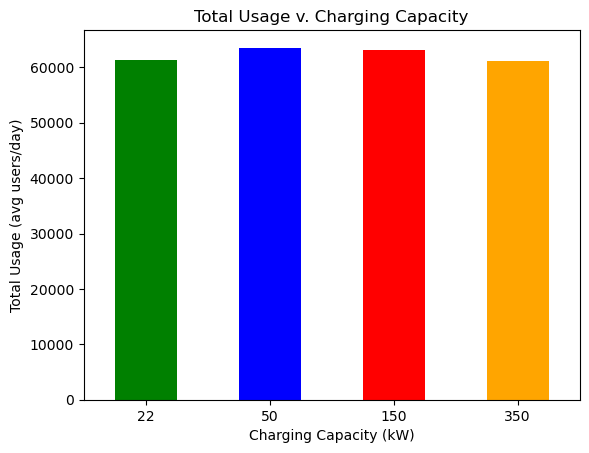

In [18]:
# 3. 
# Group by the capacity range and calculate the mean usage
grouped_data = capacity_df.groupby('Charging Capacity (kW)')['Usage (avg users/day)'].sum()

# Plot the grouped data
grouped_data.plot(kind='bar', color=['green', 'blue', 'red', 'orange'])
plt.xlabel('Charging Capacity (kW)')
plt.ylabel('Total Usage (avg users/day)')
plt.title('Total Usage v. Charging Capacity')
plt.xticks(rotation=0)
plt.show()

In [19]:
# 4.  Impact of 24/7 Availability on Usage
# Data Filtering, Statistical Comparison, and Box Plot Visualization to compare distribution
# ------------------------------------------------------------------------------------------

# Filter Data 

# Compare Usage between 24/7 stations and limiited hour stations

# Calculate Average Daily Usage for both Categories 

# Build 1-2 data visualization using Box Plot and or Bar Charts 

City with Highest Utilization: San Francisco (57.85 users/day)
City with Lowest Utilization: São Paulo (52.31 users/day)


/var/folders/mw/ftwvgm1x0p34897xs8r0hg4h0000gn/T/ipykernel_6030/1014049586.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=city_usage["City"], y=city_usage["Usage (avg users/day)"],palette='Blues')


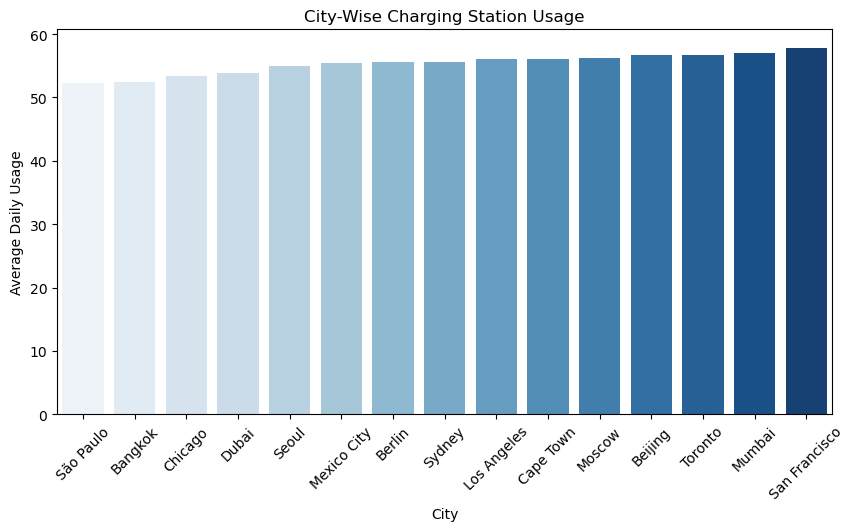

In [21]:
# 5.
city_usage = final_ev_data.groupby("City")["Usage (avg users/day)"].mean().reset_index()

city_usage = city_usage.sort_values(by='Usage (avg users/day)',ascending=True)

highest_us_city = city_usage.loc[city_usage["Usage (avg users/day)"].idxmax()]
lowest_us_city = city_usage.loc[city_usage["Usage (avg users/day)"].idxmin()]
print(f"City with Highest Utilization: {highest_us_city['City']} ({highest_us_city['Usage (avg users/day)']:.2f} users/day)")
print(f"City with Lowest Utilization: {lowest_us_city['City']} ({lowest_us_city['Usage (avg users/day)']:.2f} users/day)")

plt.figure(figsize=(10, 5))
sns.barplot(x=city_usage["City"], y=city_usage["Usage (avg users/day)"],palette='Blues')
plt.xticks(rotation=45)
plt.xlabel("City")
plt.ylabel("Average Daily Usage")
plt.title("City-Wise Charging Station Usage")
plt.show()

In [23]:
# 5. 
distance_df = final_ev_data[['Distance to City (km)','Usage (avg users/day)', 'City']]
distance_df.head()


,Distance to City (km),Usage (avg users/day),City
1,4.96,83,San Francisco
2,8.54,24,Bangkok
3,13.28,70,Toronto
4,9.76,19,Mumbai
5,2.02,39,São Paulo


In [24]:

# 5.
# Create an empty Plotly figure
fig = go.Figure()

# Add traces for each city
for city in distance_df['City'].unique():
    city_data = distance_df[distance_df['City'] == city]
    
    # Scatter plot for the city
    fig.add_trace(go.Scatter(x=city_data['Distance to City (km)'], 
                             y=city_data['Usage (avg users/day)'],
                             mode='markers', name=f'{city} (Data)'))
    
    # Calculate the regression line for the city using linregress
    slope, intercept, _, _, _ = linregress(city_data['Distance to City (km)'], 
                                           city_data['Usage (avg users/day)'])
    
    # Create the regression line
    regression_line_x = np.linspace(city_data['Distance to City (km)'].min(),
                                    city_data['Distance to City (km)'].max(),
                                    100)
    regression_line_y = slope * regression_line_x + intercept
    
    # Plot the regression line
    fig.add_trace(go.Scatter(x=regression_line_x, 
                             y=regression_line_y, 
                             mode='lines', 
                             name=f'{city} (Regression Line)', 
                             line=dict(color='red', dash='dash')))

# Add dropdown menu to filter cities
buttons = []
for city in distance_df['City'].unique():
    visible_list = [trace.name == f'{city} (Data)' or trace.name == f'{city} (Regression Line)' for trace in fig.data]
    buttons.append({'label': city,
                    'method': 'update',
                    'args': [{'visible': visible_list},
                             {'title': f"City-Wise Charging Station Usage: {city}"}]})

fig.update_layout(
    updatemenus=[
        {
            'buttons': buttons,
            'direction': 'down',
            'showactive': True,
        }
    ],
    title="City-Wise Charging Station Usage with Regression Line",
    xaxis_title = 'Distance to City (km)',
    yaxis_title = 'Usage (avg users/day)'
)

# Show the plot
fig.show()


In [26]:
# 6.  Cost Analysis by City
# Calculate Average Cost per kWh, Visualize with Pie Chart
# ----------------------------------------------------------

Cost_analysis_by_city = final_ev_data[['Station ID', 'Latitude', 'Longitude', 'Usage (avg users/day)', 
    'Charger Type', 'Charging Capacity (kW)', 'Cost (USD/kWh)', 'City', 'Distance to City (km)'
]].copy()
Cost_analysis_by_city.head()
#Group Data by City 

# Calculate the average cost and distribution of costs.  

# Geoapify integration for creating mapping usage 

# Pie Chart for cost distribution 

# Build 1-2 Data Visualizations for cost differences across regions 

,Station ID,Latitude,Longitude,Usage (avg users/day),Charger Type,Charging Capacity (kW),Cost (USD/kWh),City,Distance to City (km)
1,EVS00002,37.861857,-122.490299,83,DC Fast Charger,350,0.19,San Francisco,4.96
2,EVS00003,13.776092,100.412776,24,AC Level 2,50,0.48,Bangkok,8.54
3,EVS00004,43.628250,-79.468935,70,AC Level 1,350,0.41,Toronto,13.28
4,EVS00005,19.119865,72.913368,19,AC Level 2,350,0.11,Mumbai,9.76
5,EVS00006,-23.695008,-46.548187,39,AC Level 2,350,0.22,São Paulo,2.02


In [34]:
#6.Group Data by City 
# Calculate the average cost and distribution of costs.  

avg_cost_per_city = final_ev_data.groupby("City")["Cost (USD/kWh)"].mean()
avg_cost_per_city


City
Bangkok          0.309968
Beijing          0.306050
Berlin           0.304897
Cape Town        0.295605
Chicago          0.299610
Dubai            0.294054
Los Angeles      0.289650
Mexico City      0.293396
Moscow           0.313594
Mumbai           0.301905
San Francisco    0.295031
Seoul            0.314114
Sydney           0.306576
São Paulo        0.290609
Toronto          0.296070
Name: Cost (USD/kWh), dtype: float64

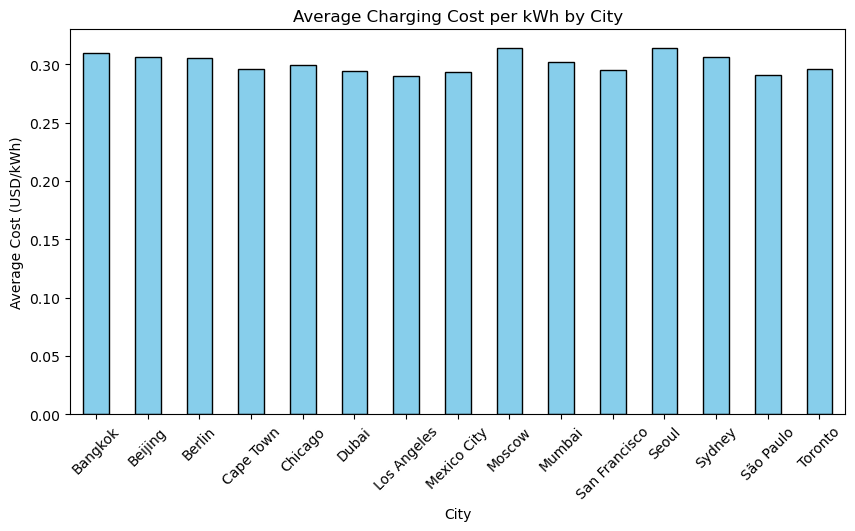

In [35]:
#6. bar Chart for cost distribution 

# Plot Bar Chart
plt.figure(figsize=(10, 5))
avg_cost_per_city.plot(kind="bar", color="skyblue", edgecolor="black")
plt.xlabel("City")
plt.ylabel("Average Cost (USD/kWh)")
plt.title("Average Charging Cost per kWh by City")
plt.xticks(rotation=45)

# Show Plot
plt.show()

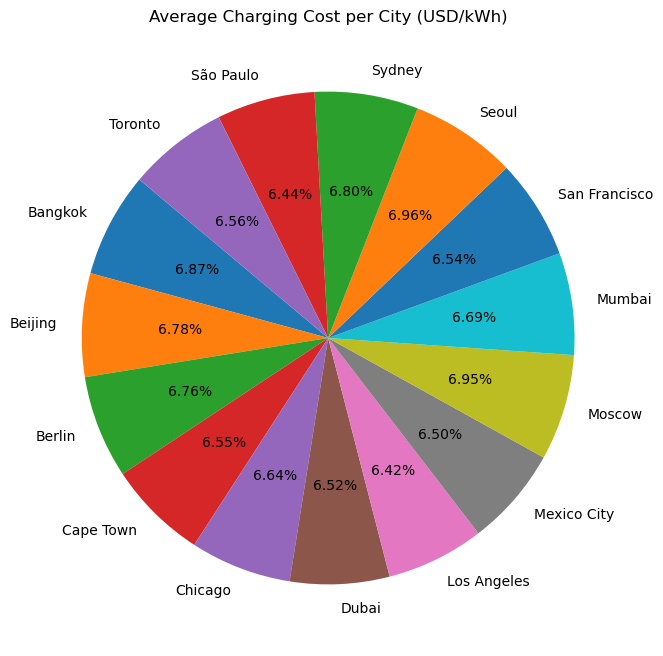

In [41]:
# 6.pie Chart for cost distribution 

# Plot pie chart
plt.figure(figsize=(8, 8))
plt.pie(avg_cost_per_city, labels=avg_cost_per_city.index,autopct='%1.2f%%',startangle=140)

plt.title("Average Charging Cost per City (USD/kWh)")
plt.show()


In [ ]:

# Charging Cost by City Analysis.

# The average charging cost per kWh varies significantly across different cities with lowest costs in Mumbai ($0.11/kWh). This Likely due to government subsidies, lower electricity rates, or other factors like competition.
# The highest cost is in Bangkok ($0.48/kWh).This may possibly due to higher electricity tariffs, infrastructure costs or lower competition with other EV charging providers in the city.
# 
# Usage and Charging Capacity Impact
# San Francisco has the highest usage (83 users/day) with a DC Fast Charger (350 kW), yet its cost remains competitive at $0.19/kWh.
# Toronto and Bangkok have lower usage but relatively high costs, suggesting potential pricing inefficiencies, higher operational costs or lower government subsidies to EV Charging stations

# The analysis highlights opportunities for cost optimization, strategic expansion, and pricing adjustments to improve profitability and user adoption. Targeted actions in high-cost and low-usage cities can enhance overall EV charging efficiency and competitiveness.








